# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [scipy](https://scipy.org/), [numpy](https://numpy.org/) și [matplotlib](https://matplotlib.org/).

In [1]:
from scipy import misc, ndimage
import numpy as np
import matplotlib.pyplot as plt

# Imaginea cu care lucrăm

Vom folosi o imagine din setul de date oferit implicit de către scipy.

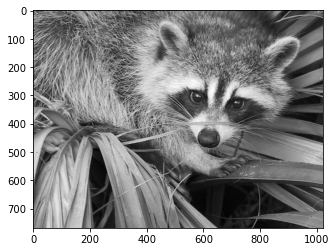

In [2]:
X = misc.face(gray=True)
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

# Transformata Fourier a unei imagini

Transformata Fourier Discretă se extinde ușor la mai multe dimensiuni. Pentru un semnal bidimensional precum o imagine DFT devine:

$$
Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}\sum_{n_2=0}^{N_2-1}x_{n_1,n_2}e^{-j2\pi(m_1 n_1/N_1 + m_2 n_2/N_2)}
$$

* unde $n_1$ și $n_2$ sunt pozițile pixelilor pe orizontală, respectiv, pe verticală
* bin-urile rezultate corespund pozițiilor pixelilor
* spectrul este în continuare simetric
* proprietățile transformatei DFT 1D sunt respectate și în cazul celei 2D

În continuare vom folosi rutina generală `fft2` ce servește mai bine activității de învățare, deși pentru semnale reale ar trebui să folosim `rfft2` ce întoarce doar informația esențială (ex. omite simetriile). De asemenea vom analiza spectrul în scală logaritmică pentru a diferenția mai bine magnitudinile bin-urilor DTF.

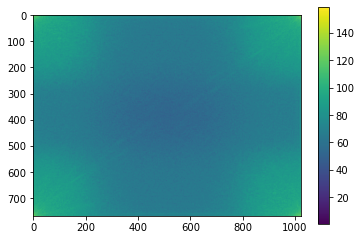

In [3]:
Y = np.fft.fft2(X)
freq_db = 20*np.log10(abs(Y))

plt.imshow(freq_db)
plt.colorbar()
plt.show()

Operațiile efectuate direct asupra imaginii se reflectă și în spectrul acesteia. Iată un exemplu a unei rotații de 45 de grade:

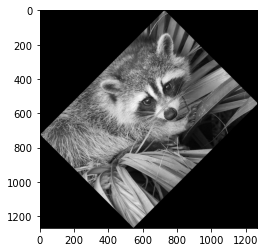

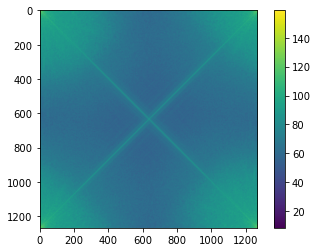

In [4]:
rotate_angle = 45
X45 = ndimage.rotate(X, rotate_angle)
plt.imshow(X45, cmap=plt.cm.gray)
plt.show()

Y45 = np.fft.fft2(X45)
plt.imshow(20*np.log10(abs(Y45)))
plt.colorbar()
plt.show()

Momentan pe axe sunt afișate numărul bin-urilor. Pentru a obține frecvențele asociate folosiți `fftfreq`:

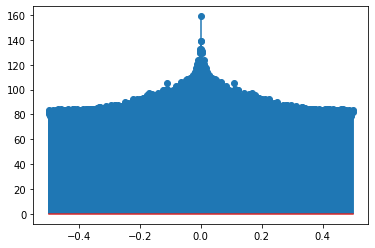

In [5]:
freq_x = np.fft.fftfreq(X.shape[1])
freq_y = np.fft.fftfreq(X.shape[0])

plt.stem(freq_x, freq_db[:][0])
plt.show()

# Atenuarea frecvențelor înalte

Pentru a anula frecvențele de peste un anumit prag `freq_cutoff` putem pur și simplu anula intrările din spectru și aplica transformata Fourier inversă:

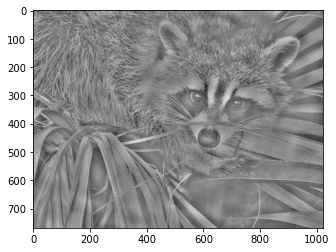

In [6]:
freq_cutoff = 120

Y_cutoff = Y.copy()
Y_cutoff[freq_db > freq_cutoff] = 0
X_cutoff = np.fft.ifft2(Y_cutoff)
X_cutoff = np.real(X_cutoff)    # avoid rounding erros in the complex domain,
                                # in practice use irfft2
plt.imshow(X_cutoff, cmap=plt.cm.gray)
plt.show()

# Zgomot

Zgomotul alb perturbă în mod egal spectrul semnalului. Este astfel egal distribuit și regăsit în toate bin-urile DFT. [Zgomotul color](https://en.wikipedia.org/wiki/Colors_of_noise) se schimbă de-a lungul frecvențelor.

Putem adăuga zgomot în limita a `pixel_noise` pixeli imaginii folosind `random.randint`:

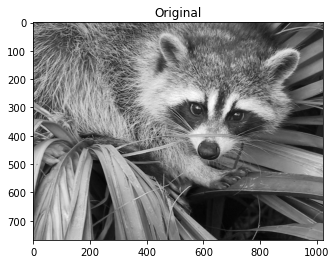

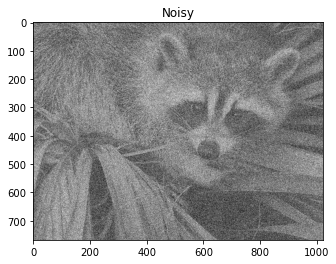

In [7]:
pixel_noise = 200

noise = np.random.randint(-pixel_noise, high=pixel_noise+1, size=X.shape)
X_noisy = X + noise
plt.imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.show()
plt.imshow(X_noisy, cmap=plt.cm.gray)
plt.title('Noisy')
plt.show()

# Sarcini

1. [8p] Produceți imaginile și spectrul pentru funcțiile de mai jos și dați o explicație scurtă pentru fiecare rezultat.
* $x_{n_1,n_2} = \sin(2\pi n_1 + 3\pi n_2)$
* $x_{n_1,n_2} = \sin(4\pi n_1) + \cos(6\pi n_2)$
* $Y_{0,5} = Y_{0,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,0} = Y_{N-5,0} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,5} = Y_{N-5,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$

*Atenție*: $x$ reprezintă informație în domeniul timpului, $Y$ în domeninul frecvenței.

2. [4p] Comprimați imaginea cu ratonul de mai sus prin atenuarea frecvențelor înalte până la un prag SNR autoimpus.

3. [4p] Eliminați zgomotul adăugat la imaginea cu ratonul produsă mai sus. Prezentați raportul SNR înainte și după.

4. [4p] Alegeți o secvență scurtă de timp (ex. 5-10 secunde) și eliminați un instrument la alegere din semnalul audio rezultat în urma rezolvării sarcinilor de la [laboratorul 3](https://cs.unibuc.ro/~pirofti/ps/ps-lab-3.pdf).

# Exercitiul 1

First function:


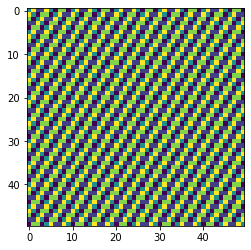

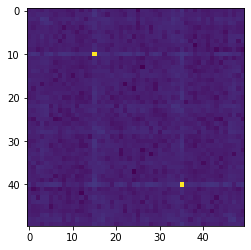

Second function:


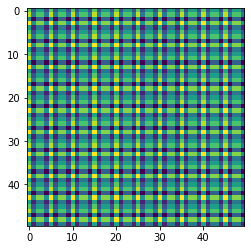

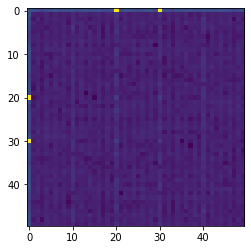

Third function:


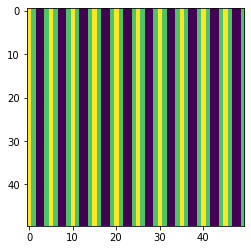

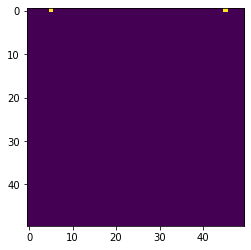

Forth function:


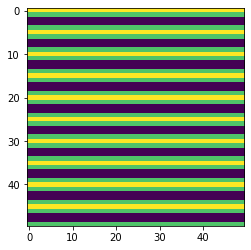

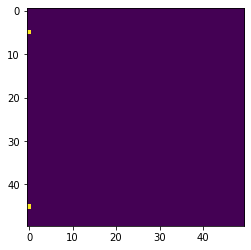

Fifth function:


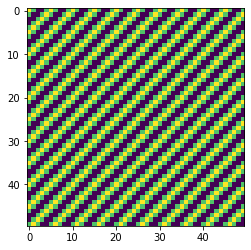

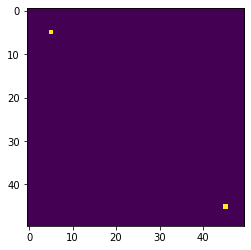

In [8]:
import math

def compute_matrix(N: int, M: int, fn, eps=0.2) -> np.ndarray:
    """
        Computes a matrix, given a function and dimensions.
    """
    return np.array([
        [fn(i * eps, j * eps) for j in range(M)] for i in range(N)
    ])

def show_function(fn, N=50, M=50):
    mat = compute_matrix(N, M, fn)
    plt.imshow(mat)
    plt.show()
    im_fft = np.fft.fft2(mat)
    freq_db = 20*np.log10(abs(im_fft))
    plt.imshow(freq_db)
    plt.show()

print("First function:")
show_function(lambda x, y: math.sin(2 * math.pi * x + 3 * math.pi * y))
"""
In domeniul frecventei, vedem ca avem doua puncte la coordonate (2x, 3x) respectiv (N-2x, N-3x).
Al doilea punct este dat de simetria transformatei FFT.

Primul punct este datorat faptului ca imaginea este compusa dintr-un semnal elementar sinusoid, al carui coeficienti
in x si y sunt 2, respectiv 3. X se datoreaza dimensiunii imaginii si epsilon-ului (sampling frequency) ales. 
"""

print("Second function:")
show_function(lambda x, y: math.sin(4 * math.pi * x) + math.cos(6 * math.pi * y))
"""
In domeniul frecventei, vedem ca avem doua puncte pe prima linie si doua pe prima coloana.
Al doilea punct de pe linie / coloana este dat de simetria transformatei FFT.

Cum imaginea este compusa ca suma directa a doua semnale, unul care depinde numai de X si unul care depinde numai de Y,
fiecare semnal este reprezentat independent in domeniul frecventei, unul pe prima coloana (nu are nicio dependinta in Y), si celalat pe prima linie (nu are nicio dependinta in X).
"""

"""$Y_{0,5} = Y_{0,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,0} = Y_{N-5,0} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,5} = Y_{N-5,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$"""

print("Third function:")
N, M = 50, 50
Y = np.zeros((N, M))
Y[0, 5] = Y[0, N-5] = 1
im_fft = np.fft.ifft2(Y)
plt.imshow(np.abs(im_fft))
plt.show()
plt.imshow(Y)
plt.show()
"""
In domeniul frecventei, avem doua puncte, ambele la X=0. 

Asadar, semnalul nostru este compus dintr-o sinusioda care nu depinde deloc de X. Altfel spus, avem dungi pe coloane.
"""

print("Forth function:")
N, M = 50, 50
Y = np.zeros((N, M))
Y[5, 0] = Y[N-5, 0] = 1
im_fft = np.fft.ifft2(Y)
plt.imshow(np.abs(im_fft))
plt.show()
plt.imshow(Y)
plt.show()
"""
In domeniul frecventei, avem doua puncte, ambele la Y=0. 

Asadar, semnalul nostru este compus dintr-o sinusioda care nu depinde deloc de Y. Altfel spus, avem dungi pe linii.
"""

print("Fifth function:")
N, M = 50, 50
Y = np.zeros((N, M))
Y[5, 5] = Y[N-5, N-5] = 1
im_fft = np.fft.ifft2(Y)
plt.imshow(np.abs(im_fft))
plt.show()
plt.imshow(Y)
plt.show()
"""
In domeniul frecventei, avem doua puncte, ambele la X=Y 

Asadar, semnalul nostru este compus dintr-o sinusioda care depinde de suma X+Y. Altfel spus, avem dungi pe diagonala principala.
"""
pass

# Exercitiul 2

Compresii cu diferite threshold values


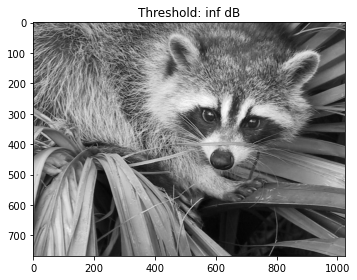

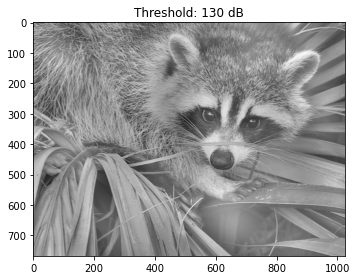

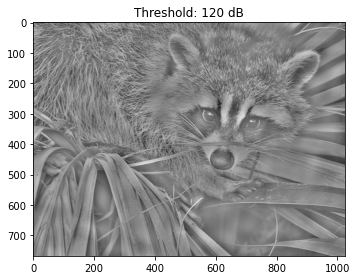

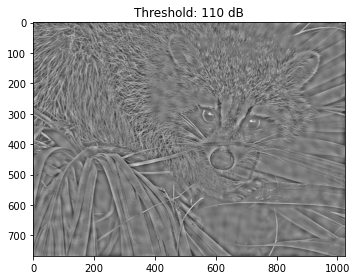

In [9]:
def filter_plot(img, threshold):
    img = img.copy()
    # apply threshold
    dft = np.fft.rfft2(img)
    dft_db = 20 * np.log10(np.abs(dft))
    dft[dft_db > threshold] = 0.

    # get image
    modified_img = np.fft.irfft2(dft)

    plt.imshow(modified_img, cmap="gray")
    plt.title(f"Threshold: {threshold} dB")
    plt.tight_layout()
    plt.show()

print("Compresii cu diferite threshold values")

threshes = [np.inf, 130, 120, 110]
for t in threshes:
    filter_plot(X, t)

# filter_plot

    

# Exercitiu 3

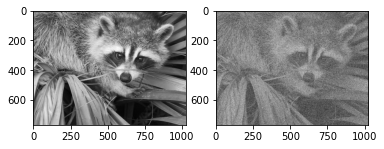

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(X, cmap="gray")
ax[1].imshow(X_noisy, cmap="gray")
plt.show()

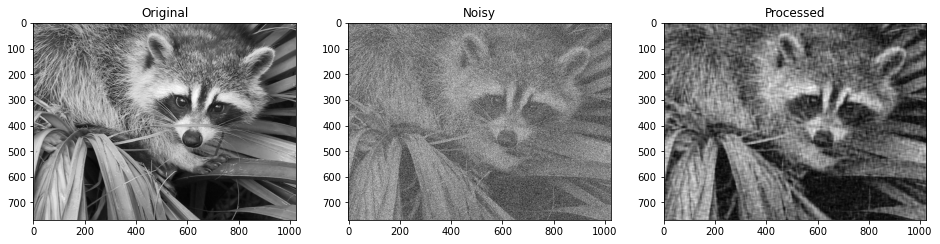

In [94]:
from scipy.ndimage import gaussian_filter, median_filter

Y_noisy = np.fft.fft2(X_noisy)

szx, szy = Y_noisy.shape
nr_rem_x, nr_rem_y = 0.47, 0.47

Y_noisy[int(szx // 2 - szx * nr_rem_x):int(szx // 2 + szx * nr_rem_x),
        int(szy // 2 - szy * nr_rem_y):int(szy // 2 + szy * nr_rem_y)] = 0.

X_not_noisy = np.abs(np.fft.ifft2(Y_noisy)).astype(int)

X_not_noisy = median_filter(X_not_noisy, size=6)
X_not_noisy = gaussian_filter(X_not_noisy, sigma=0.2)

# ajustam brightness
initial_avg = np.mean(X)
X_not_noisy = X_not_noisy * initial_avg / np.mean(X_not_noisy)

X_not_noisy = X_not_noisy.astype(int)

fig, ax = plt.subplots(ncols=3, nrows=1)
ax[0].imshow(X, cmap="gray")
ax[0].set_title("Original")

ax[1].imshow(X_noisy, cmap="gray")
ax[1].set_title("Noisy")

ax[2].imshow(X_not_noisy, cmap="gray")
ax[2].set_title("Processed")


fig.set_figwidth(16)
fig.set_figheight(7)

plt.show()

In [95]:
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if(mse == 0):
        return 0
    max_pixel = np.max(img1)
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

print(f"psnr(X, X_noisy)     = {psnr(X, X_noisy):.4f} dB")
print(f"psnr(X, X_not_noisy) = {psnr(X, X_not_noisy):.4f} dB")

psnr(X, X_noisy)     = 6.6830 dB
psnr(X, X_not_noisy) = 20.6083 dB


# Exercitiul 4

Avem notebook-ul <a href="./ps-tema-1-ex-4.ipynb">`ps-tema-1-ex-4.ipynb`</a> cu solutia pentru acest exercitiu.